# 1. Getting Started with Cobra

### Loading E.coli and Salmonella models

In [1]:
from __future__ import print_function
import cobra
import cobra.test
model = cobra.test.create_test_model("textbook") #could be ecoli or salmonella

In [11]:
print (len(model.reactions))

95


In [12]:
print(len(model.metabolites))

72


In [13]:
print(len(model.genes))

137


In [14]:
model

<Model e_coli_core at 0x10febdc18>

In [15]:
model.reactions[29]

<Reaction EX_glu__L_e at 0x110f76320>

In [17]:
pgi = model.reactions.get_by_id("PGI")
print(pgi.name)
print(pgi.reaction)
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)
print(pgi.reversibility)

glucose-6-phosphate isomerase
g6p_c <=> f6p_c
-1000.0 < pgi < 1000.0
True


In [21]:
atp = model.metabolites.get_by_id("atp_c")
print(atp.name)
print(atp.compartment)
print(atp.charge)
print(atp.formula)

ATP
c
-4
C10H12N5O13P3


In [25]:
gpr = pgi.gene_reaction_rule
print(gpr)
pgi.genes
pgi_gene = model.genes.get_by_id("b4025")
pgi_gene

b4025


<Gene b4025 at 0x110f62dd8>

### Making reversible changes to the model

In [29]:
model = cobra.test.create_test_model('textbook')
for reaction in model.reactions[:5]:
    print(reaction.bounds)
    with model as model:
        reaction.knock_out() #setting bounds to (0,0)
        model.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model.objective.value))#after completion bounds are reset

(-1000.0, 1000.0)
ACALD blocked (bounds: (0, 0)), new growth rate 0.873922
(-1000.0, 1000.0)
ACALDt blocked (bounds: (0, 0)), new growth rate 0.873922
(-1000.0, 1000.0)
ACKr blocked (bounds: (0, 0)), new growth rate 0.873922
(-1000.0, 1000.0)
ACONTa blocked (bounds: (0, 0)), new growth rate -0.000000
(-1000.0, 1000.0)
ACONTb blocked (bounds: (0, 0)), new growth rate -0.000000


### Setting up different objectives with the same model

In [30]:
print('original objective: ', model.objective.expression)
with model:
    model.objective = 'ATPM'
    print('print objective in first context:', model.objective.expression)
    with model:
        model.objective = 'ACALD'
        print('print objective in second context:', model.objective.expression)
    print('objective after exiting second context:',
          model.objective.expression)
print('back to original objective:', model.objective.expression)

original objective:  -1.0*Biomass_Ecoli_core_reverse_2cdba + 1.0*Biomass_Ecoli_core
print objective in first context: -1.0*ATPM_reverse_5b752 + 1.0*ATPM
print objective in second context: 1.0*ACALD - 1.0*ACALD_reverse_fda2b
objective after exiting second context: -1.0*ATPM_reverse_5b752 + 1.0*ATPM
back to original objective: -1.0*Biomass_Ecoli_core_reverse_2cdba + 1.0*Biomass_Ecoli_core


# 2. Building a model

In [3]:
from cobra import Model, Reaction, Metabolite
model = Model('example_model')
reaction = Reaction("3OAS140")
reaction.name = '3 oxoacyl acyl carrier protein synthase n C140 '
reaction.subsystem = 'Cell Envelope Biosynthesis'
reaction.lower_bound = 0.  # This is the default
reaction.upper_bound = 1000.  # This is the default

In [4]:
ACP_c = Metabolite(
    'ACP_c',
    formula='C11H21N2O7PRS',
    name='acyl-carrier-protein',
    compartment='c')
omrsACP_c = Metabolite(
    '3omrsACP_c',
    formula='C25H45N2O9PRS',
    name='3-Oxotetradecanoyl-acyl-carrier-protein',
    compartment='c')
co2_c = Metabolite('co2_c', formula='CO2', name='CO2', compartment='c')
malACP_c = Metabolite(
    'malACP_c',
    formula='C14H22N2O10PRS',
    name='Malonyl-acyl-carrier-protein',
    compartment='c')
h_c = Metabolite('h_c', formula='H', name='H', compartment='c')
ddcaACP_c = Metabolite(
    'ddcaACP_c',
    formula='C23H43N2O8PRS',
    name='Dodecanoyl-ACP-n-C120ACP',
    compartment='c')

In [5]:
reaction.add_metabolites({#dictionary with their stoichiometric coefficients
    malACP_c: -1.0,
    h_c: -1.0,
    ddcaACP_c: -1.0,
    co2_c: 1.0,
    ACP_c: 1.0,
    omrsACP_c: 1.0
})

reaction.reaction  # This gives a string representation of the reaction

'ddcaACP_c + h_c + malACP_c --> 3omrsACP_c + ACP_c + co2_c'

In [6]:
# Schellenberger et al 2011 Nature Protocols 6(9):1290-307
reaction.gene_reaction_rule = '( STM2378 or STM1197 )'
reaction.genes

frozenset({<Gene STM1197 at 0x1168e5c18>, <Gene STM2378 at 0x1168e5be0>})

In [7]:
model.add_reactions([reaction])
print('%i reaction' % len(model.reactions))
print('%i metabolites' % len(model.metabolites))
print('%i genes' % len(model.genes))

1 reaction
6 metabolites
2 genes


In [8]:

# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s : %s" % (x.id, x.reaction))

print("")
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print('%9s : %s' % (x.id, x.formula))

print("")
print("Genes")
print("-----")
for x in model.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" %
          (x.id, "{" + ", ".join(associated_ids) + "}"))

Reactions
---------
3OAS140 : ddcaACP_c + h_c + malACP_c --> 3omrsACP_c + ACP_c + co2_c

Metabolites
-----------
 malACP_c : C14H22N2O10PRS
      h_c : H
ddcaACP_c : C23H43N2O8PRS
    co2_c : CO2
    ACP_c : C11H21N2O7PRS
3omrsACP_c : C25H45N2O9PRS

Genes
-----
STM1197 is associated with reactions: {3OAS140}
STM2378 is associated with reactions: {3OAS140}


In [9]:
model.objective = '3OAS140'
print(model.objective.expression)
print(model.objective.direction)

-1.0*3OAS140_reverse_65ddc + 1.0*3OAS140
max


# 3. Reading and Writing Models

* Support models in SBML, JSON, YAML, MAT, and pickle formats
* SBML with FBC version 2 is the preferred format for general use
* Package includes test models in various formats

In [11]:
import cobra.test
import os
from os.path import join

data_dir = cobra.test.data_dir

print("mini test files: ")
print(", ".join(i for i in os.listdir(data_dir) if i.startswith("mini")))

textbook_model = cobra.test.create_test_model("textbook")
ecoli_model = cobra.test.create_test_model("ecoli")
salmonella_model = cobra.test.create_test_model("salmonella")

mini test files: 
mini.json, mini.mat, mini.pickle, mini.yml, mini_cobra.xml, mini_fbc1.xml, mini_fbc2.xml, mini_fbc2.xml.bz2, mini_fbc2.xml.gz


* Just going to look at SBML for now
* Please note that all id’s in the model must conform to the SBML SID requirements in order to generate a valid SBML file
* Other formats, etc. @ https://cobrapy.readthedocs.io/en/stable/io.html

In [12]:
cobra.io.read_sbml_model(join(data_dir, "mini_fbc2.xml"))
#cobra.io.write_sbml_model(textbook_model, "test_fbc2.xml")

<Model mini_textbook at 0x116936828>

# 4. Simulating with FBA

* Maximizing or minimizing flux through objective reactions

In [1]:
import cobra.test
model = cobra.test.create_test_model("textbook")

In [2]:
solution = model.optimize()
print(solution)

<Solution 0.874 at 0x11a0efcf8>


In [3]:
%%time
model.optimize().objective_value

CPU times: user 2.11 ms, sys: 47 µs, total: 2.16 ms
Wall time: 2.17 ms


0.8739215069684307

In [4]:
%%time
model.slim_optimize()

CPU times: user 184 µs, sys: 13 µs, total: 197 µs
Wall time: 205 µs


0.8739215069684307

In [5]:
model.summary()

IN FLUXES        OUT FLUXES    OBJECTIVES
---------------  ------------  ----------------------
o2_e      21.8   h2o_e  29.2   Biomass_Ecol...  0.874
glc__D_e  10     co2_e  22.8
nh4_e      4.77  h_e    17.5
pi_e       3.21


In [6]:
model.metabolites.nadh_c.summary()

PRODUCING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  --------------------------------------------------
42%    16     GAPD        g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
24%     9.28  PDH         coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
13%     5.06  AKGDH       akg_c + coa_c + nad_c --> co2_c + nadh_c + succ...
13%     5.06  MDH         mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
8%      3.1   Biomass...  1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0....

CONSUMING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  --------------------------------------------------
100%   38.5   NADH16      4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q...


In [7]:
model.metabolites.atp_c.summary()

PRODUCING REACTIONS -- ATP (atp_c)
----------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
67%  45.5    ATPS4r      adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
23%  16      PGK         3pg_c + atp_c <=> 13dpg_c + adp_c
7%    5.06   SUCOAS      atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
3%    1.76   PYK         adp_c + h_c + pep_c --> atp_c + pyr_c

CONSUMING REACTIONS -- ATP (atp_c)
----------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
76%  52.3    Biomass...  1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0....
12%   8.39   ATPM        atp_c + h2o_c --> adp_c + h_c + pi_c
11%   7.48   PFK         atp_c + f6p_c --> adp_c + fdp_c + h_c
0%    0.223  GLNS        atp_c + glu__L_c + nh4_c --> adp_c + gln__L_c +...


In [9]:
# Getting the biomass reaction
biomass_rxn = model.reactions.get_by_id("Biomass_Ecoli_core")
biomass_rxn

<Reaction Biomass_Ecoli_core at 0x11a0e3320>

* The objective function can be changed by assigning Model.objective, which can be a reaction object (or just it’s name), or a dict of {Reaction: objective_coefficient}

In [13]:
from cobra.util.solver import linear_reaction_coefficients
model.objective = "Biomass_Ecoli_core"
print(linear_reaction_coefficients(model))
# change the objective to ATPM
model.objective = "ATPM"

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id("ATPM").upper_bound = 1000.
print(linear_reaction_coefficients(model))

{<Reaction Biomass_Ecoli_core at 0x11a0e3320>: 1.0}
{<Reaction ATPM at 0x11a0e32e8>: 1.0}


In [14]:
model.optimize().objective_value

174.99999999999966

* Running FVA
    * FBA sometimes have more than one solution
    * FVA finds the ranges of each metabolic flux at the optimum

In [15]:
from cobra.flux_analysis import flux_variability_analysis
flux_variability_analysis(model, model.reactions[:10])

maximum       minimum
ACALD  -2.208811e-30 -5.247085e-14
ACALDt  0.000000e+00 -5.247085e-14
ACKr    0.000000e+00 -8.024953e-14
ACONTa  2.000000e+01  2.000000e+01
ACONTb  2.000000e+01  2.000000e+01
ACt2r   0.000000e+00 -8.024953e-14
ADK1    3.410605e-13  0.000000e+00
AKGDH   2.000000e+01  2.000000e+01
AKGt2r  0.000000e+00 -2.902643e-14
ALCD2x  0.000000e+00 -4.547474e-14

In [16]:
cobra.flux_analysis.flux_variability_analysis(
    model, model.reactions[:10], fraction_of_optimum=0.9)

maximum   minimum
ACALD   0.000000e+00 -2.692308
ACALDt  0.000000e+00 -2.692308
ACKr    6.635712e-30 -4.117647
ACONTa  2.000000e+01  8.461538
ACONTb  2.000000e+01  8.461538
ACt2r   0.000000e+00 -4.117647
ADK1    1.750000e+01  0.000000
AKGDH   2.000000e+01  2.500000
AKGt2r  2.651196e-16 -1.489362
ALCD2x  0.000000e+00 -2.333333

In [17]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=False)

maximum  minimum
FRD7     980.0      0.0
SUCDi   1000.0     20.0

In [18]:
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=True)

maximum  minimum
FRD7       0.0      0.0
SUCDi     20.0     20.0

In [19]:
model.optimize()
model.summary(fva=0.95)

IN FLUXES                     OUT FLUXES                    OBJECTIVES
----------------------------  ----------------------------  ------------
id          Flux  Range       id          Flux  Range       ATPM  175
--------  ------  ----------  --------  ------  ----------
o2_e          60  [55.9, 60]  co2_e         60  [54.2, 60]
glc__D_e      10  [9.5, 10]   h2o_e         60  [54.2, 60]
nh4_e          0  [0, 0.673]  for_e          0  [0, 5.83]
pi_e           0  [0, 0.171]  h_e            0  [0, 5.83]
                              ac_e           0  [0, 2.06]
                              acald_e        0  [0, 1.35]
                              pyr_e          0  [0, 1.35]
                              etoh_e         0  [0, 1.17]
                              lac__D_e       0  [0, 1.13]
                              succ_e         0  [0, 0.875]
                              akg_e          0  [0, 0.745]
                              glu__L_e       0  [0, 0.673]


In [20]:
model.metabolites.pyr_c.summary(fva=0.95)

PRODUCING REACTIONS -- Pyruvate (pyr_c)
---------------------------------------
%       FLUX  RANGE         RXN ID      REACTION
----  ------  ------------  ----------  ----------------------------------------
50%       10  [1.25, 18.8]  PYK         adp_c + h_c + pep_c --> atp_c + pyr_c
50%       10  [9.5, 10]     GLCpts      glc__D_e + pep_c --> g6p_c + pyr_c
0%         0  [0, 8.75]     ME1         mal__L_c + nad_c --> co2_c + nadh_c +...
0%         0  [0, 8.75]     ME2         mal__L_c + nadp_c --> co2_c + nadph_c...

CONSUMING REACTIONS -- Pyruvate (pyr_c)
---------------------------------------
%       FLUX  RANGE         RXN ID      REACTION
----  ------  ------------  ----------  ----------------------------------------
100%      20  [13, 28.8]    PDH         coa_c + nad_c + pyr_c --> accoa_c + c...
0%         0  [0, 8.75]     PPS         atp_c + h2o_c + pyr_c --> amp_c + 2.0...
0%         0  [0, 5.83]     PFL         coa_c + pyr_c --> accoa_c + for_c
0%         0  [0, 1.35]     

* Running pFBA (parsimonious FBA)
    * minimizes the total sum of flux
    * Lewis et al. (2010)
    * Need to read more about this

In [21]:
model.objective = 'Biomass_Ecoli_core'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [22]:
fba_solution

<Solution 0.874 at 0x11a2b23c8>

In [27]:
pfba_solution.fluxes

ACALD                 0.000000e+00
ACALDt                0.000000e+00
ACKr                 -1.937884e-14
ACONTa                6.007250e+00
ACONTb                6.007250e+00
ACt2r                -1.937884e-14
ADK1                  0.000000e+00
AKGDH                 5.064376e+00
AKGt2r                0.000000e+00
ALCD2x                0.000000e+00
ATPM                  8.390000e+00
ATPS4r                4.551401e+01
Biomass_Ecoli_core    8.739215e-01
CO2t                 -2.280983e+01
CS                    6.007250e+00
CYTBD                 4.359899e+01
D_LACt2               0.000000e+00
ENO                   1.471614e+01
ETOHt2r               0.000000e+00
EX_ac_e               1.937884e-14
EX_acald_e            0.000000e+00
EX_akg_e              0.000000e+00
EX_co2_e              2.280983e+01
EX_etoh_e             0.000000e+00
EX_for_e              0.000000e+00
EX_fru_e              0.000000e+00
EX_fum_e              0.000000e+00
EX_glc__D_e          -1.000000e+01
EX_gln__L_e         

In [28]:
pfba_solution.fluxes["Biomass_Ecoli_core"] 

0.87392150696843118

In [25]:
abs(fba_solution.fluxes["Biomass_Ecoli_core"] - pfba_solution.fluxes[
    "Biomass_Ecoli_core"])

7.7715611723760958e-16

In [29]:
pfba_solution

<Solution 518.422 at 0x11a2b2278>

In [30]:
linear_reaction_coefficients(model)

{<Reaction Biomass_Ecoli_core at 0x11a0e3320>: 1.0}

# 5 Simulating Deletions

In [31]:
import pandas
from time import time

import cobra.test
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

cobra_model = cobra.test.create_test_model("textbook")
ecoli_model = cobra.test.create_test_model("ecoli")

In [32]:
print('complete model: ', cobra_model.optimize())
with cobra_model:
    cobra_model.reactions.PFK.knock_out()
    print('pfk knocked out: ', cobra_model.optimize())

complete model:  <Solution 0.874 at 0x11a870fd0>
pfk knocked out:  <Solution 0.704 at 0x11a870d30>


In [33]:
deletion_results = single_gene_deletion(cobra_model)

* Single Deletions

In [38]:
single_gene_deletion(cobra_model, cobra_model.genes[:10])

flux   status
b0116  0.782351  optimal
b0118  0.873922  optimal
b0351  0.873922  optimal
b0474  0.873922  optimal
b1241  0.873922  optimal
b1276  0.873922  optimal
b1849  0.873922  optimal
b2296  0.873922  optimal
b3115  0.873922  optimal
s0001  0.211141  optimal

In [39]:
single_reaction_deletion(cobra_model, cobra_model.reactions[:20])

flux   status
ACALD               8.739215e-01  optimal
ACALDt              8.739215e-01  optimal
ACKr                8.739215e-01  optimal
ACONTa             -3.027316e-15  optimal
ACONTb             -3.027316e-15  optimal
ACt2r               8.739215e-01  optimal
ADK1                8.739215e-01  optimal
AKGDH               8.583074e-01  optimal
AKGt2r              8.739215e-01  optimal
ALCD2x              8.739215e-01  optimal
ATPM                9.166475e-01  optimal
ATPS4r              3.742299e-01  optimal
Biomass_Ecoli_core  0.000000e+00  optimal
CO2t                4.616696e-01  optimal
CS                  6.940307e-15  optimal
CYTBD               2.116629e-01  optimal
D_LACt2             8.739215e-01  optimal
ENO                 9.192213e-16  optimal
ETOHt2r             8.739215e-01  optimal
EX_ac_e             8.739215e-01  optimal

* Double deletions

In [40]:
double_gene_deletion(
    cobra_model, cobra_model.genes[-5:], return_frame=True).round(4)

b2464   b0008   b2935   b2465  b3919
b2464  0.8739  0.8648  0.8739  0.8739  0.704
b0008  0.8648  0.8739  0.8739  0.8739  0.704
b2935  0.8739  0.8739  0.8739  0.0000  0.704
b2465  0.8739  0.8739  0.0000  0.8739  0.704
b3919  0.7040  0.7040  0.7040  0.7040  0.704

# 6. Production Envelopes

* phenotype phase planes
* Edwards et al.

In [41]:
import cobra.test
from cobra.flux_analysis import production_envelope

model = cobra.test.create_test_model("textbook")

In [42]:
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])

In [43]:
prod_env.head()

EX_glc__D_e    EX_o2_e carbon_source  carbon_yield direction  flux  \
0        -10.0 -60.000000   EX_glc__D_e           0.0   minimum   0.0   
1        -10.0 -56.842105   EX_glc__D_e           0.0   minimum   0.0   
2        -10.0 -53.684211   EX_glc__D_e           0.0   minimum   0.0   
3        -10.0 -50.526316   EX_glc__D_e           0.0   minimum   0.0   
4        -10.0 -47.368421   EX_glc__D_e           0.0   minimum   0.0   

   mass_yield  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [44]:
prod_env.tail()

EX_glc__D_e   EX_o2_e carbon_source  carbon_yield direction      flux  \
403    -1.982677 -6.315789   EX_glc__D_e     11.675986   maximum  0.127661   
404    -1.982677 -3.157895   EX_glc__D_e      6.966481   maximum  0.076169   
405    -1.481594 -6.315789   EX_glc__D_e      7.206618   maximum  0.058881   
406    -1.481594 -3.157895   EX_glc__D_e      6.721044   maximum  0.054913   
407    -0.980511 -3.157895   EX_glc__D_e      5.773369   maximum  0.031217   

     mass_yield  
403         NaN  
404         NaN  
405         NaN  
406         NaN  
407         NaN

In [50]:
prod_env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
EX_glc__D_e      408 non-null float64
EX_o2_e          408 non-null float64
carbon_source    408 non-null object
carbon_yield     408 non-null float64
direction        408 non-null object
flux             408 non-null float64
mass_yield       0 non-null float64
dtypes: float64(5), object(2)
memory usage: 22.4+ KB


In [51]:
%matplotlib inline

In [56]:
prod_env_head = prod_env.head()

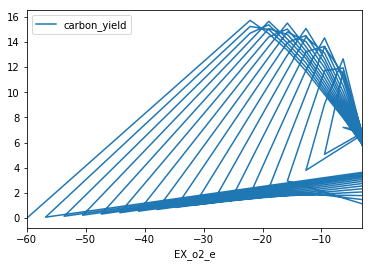

In [58]:
prod_env[prod_env.direction == 'maximum'].plot(
    kind='line', x='EX_o2_e', y='carbon_yield')